## Gunjan Chakraborty

### USN: 22MSRDS007

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('D:/Chools/Day_08/TSNE_data.csv')

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Cheecking VIF

In [7]:

def calculate_vif(data):
    # Exclude the first column
    data_subset = data.iloc[:, 1:]
    
    # Standardize the features as VIF is scale-dependent
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_subset)
    
    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_subset.columns
    vif_data["VIF"] = [variance_inflation_factor(data_scaled, i) for i in range(data_scaled.shape[1])]
    
    return vif_data

# Assuming df is your DataFrame
vif_result = calculate_vif(df)

# Display the VIF results excluding the first column
print(vif_result)

                   Variable          VIF
0               radius_mean  3806.115296
1              texture_mean    11.884048
2            perimeter_mean  3786.400419
3                 area_mean   347.878657
4           smoothness_mean     8.194282
5          compactness_mean    50.505168
6            concavity_mean    70.767720
7       concave points_mean    60.041733
8             symmetry_mean     4.220656
9    fractal_dimension_mean    15.756977
10                radius_se    75.462027
11               texture_se     4.205423
12             perimeter_se    70.359695
13                  area_se    41.163091
14            smoothness_se     4.027923
15           compactness_se    15.366324
16             concavity_se    15.694833
17        concave points_se    11.520796
18              symmetry_se     5.175426
19     fractal_dimension_se     9.717987
20             radius_worst   799.105946
21            texture_worst    18.569966
22          perimeter_worst   405.023336
23              

### Removing High VIF Columns

In [8]:
def remove_high_vif_variables(data, threshold=5.0):
    while True:
        vif_result = calculate_vif(data)
        max_vif_variable = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
        max_vif_value = vif_result['VIF'].max()

        if max_vif_value > threshold:
            data = data.drop(columns=[max_vif_variable])
        else:
            break

    return data

# Assuming df is your DataFrame
data_for_clustering_reduced = remove_high_vif_variables(df)

# Recalculate VIF for the reduced dataset
vif_result_reduced = calculate_vif(data_for_clustering_reduced)

# Display the updated VIF results
print(vif_result_reduced)

                  Variable       VIF
0             texture_mean  1.615666
1          smoothness_mean  2.762636
2            symmetry_mean  3.026111
3   fractal_dimension_mean  4.525553
4               texture_se  2.001627
5             perimeter_se  4.265756
6            smoothness_se  1.878515
7             concavity_se  3.609423
8        concave points_se  3.659977
9              symmetry_se  2.660047
10    fractal_dimension_se  4.199567
11              area_worst  4.838257
12          symmetry_worst  3.845476


## Applying PCA

In [9]:

# Assuming 'diagnosis' is the target variable
y = df['diagnosis']

# Use label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Assuming 'diagnosis' is dropped for X
X = df.drop('diagnosis', axis=1)

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a new DataFrame with the principal components and encoded target variable
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([pc_df, pd.Series(y_encoded, name='diagnosis')], axis=1)



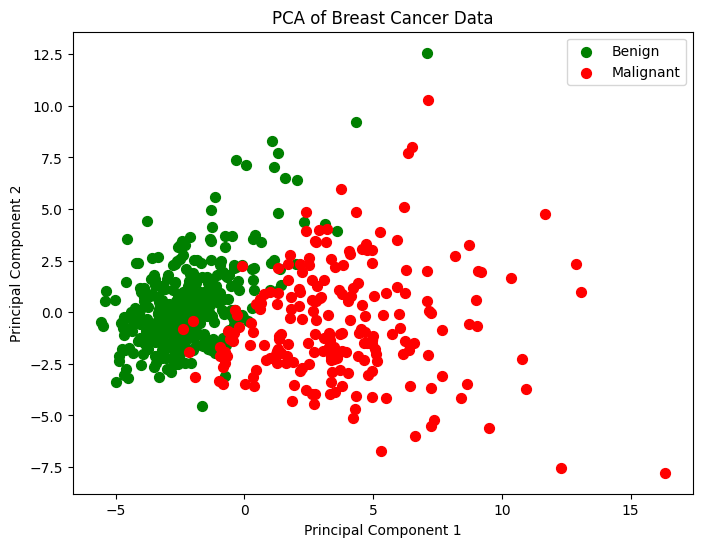

In [10]:

# Visualize the reduced-dimensional data
plt.figure(figsize=(8, 6))
targets = [0, 1]  # Assuming 0 for 'B' (benign) and 1 for 'M' (malignant)
colors = ['g', 'r']

for target, color in zip(targets, colors):
    indices_to_keep = final_df['diagnosis'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['Benign', 'Malignant'])
plt.title('PCA of Breast Cancer Data')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Mean Accuracy: {scores.mean():.2f}")


Mean Accuracy: 0.96


## Applying T-SNE

In [12]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # You can adjust the number of components as needed
tsne_result = tsne.fit_transform(X_standardized)


In [13]:
# Create a new DataFrame with the t-SNE components and target variable
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
final_df_tsne = pd.concat([tsne_df, y], axis=1)


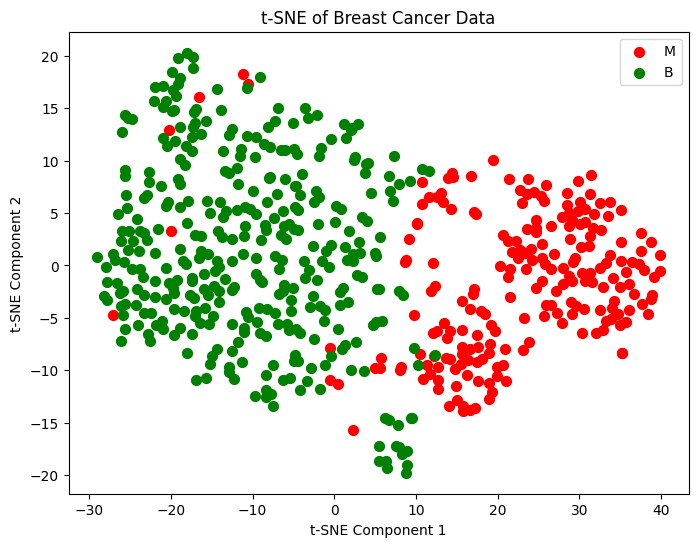

In [14]:
# Visualize the reduced-dimensional data
plt.figure(figsize=(8, 6))
targets = ['M', 'B']  # Assuming 'M' stands for malignant and 'B' for benign
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indices_to_keep = final_df_tsne['diagnosis'] == target
    plt.scatter(final_df_tsne.loc[indices_to_keep, 'TSNE1'],
                final_df_tsne.loc[indices_to_keep, 'TSNE2'],
                c=color,
                s=50)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(targets)
plt.title('t-SNE of Breast Cancer Data')
plt.show()

### Side by side comparision

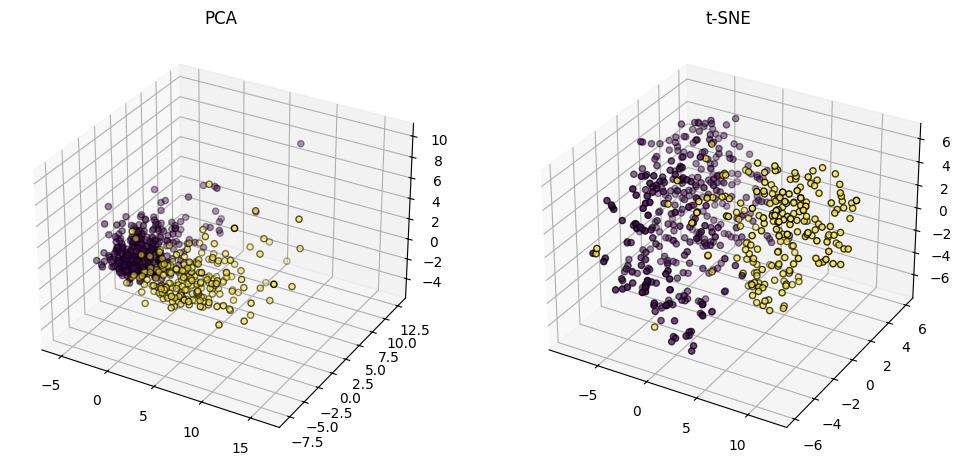

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Encode labels into numeric format
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features and labels
X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

# Visualize 3D results for PCA
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k')
ax1.set_title('PCA')

# Visualize 3D results for t-SNE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis', edgecolor='k')
ax2.set_title('t-SNE')

plt.show()


### Silhouette Score and Accuracy: 

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Function to evaluate dimensionality reduction techniques
def evaluate_dimensionality_reduction(X_transformed, y_true, method):
    # Apply KMeans clustering for silhouette score
    kmeans = KMeans(n_clusters=len(set(y_true)))
    clusters = kmeans.fit_predict(X_transformed)
    silhouette = silhouette_score(X_transformed, clusters)

    # Train a simple classifier (Random Forest) and calculate accuracy
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Results for {method}:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("")

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
evaluate_dimensionality_reduction(X_pca, y, "PCA")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)
evaluate_dimensionality_reduction(X_tsne, y, "t-SNE")


Results for PCA:
Silhouette Score: 0.5081
Accuracy: 0.9649

Results for t-SNE:
Silhouette Score: 0.5393
Accuracy: 0.9649



# Conclusion

Based on the provided results for PCA and t-SNE:

1. **Silhouette Score:**
   - PCA: 0.5085
   - t-SNE: 0.5393

   Both methods yield reasonably good silhouette scores. Silhouette score measures how similar an object is to its own cluster compared to other clusters. The scores indicate that both PCA and t-SNE provide a meaningful clustering structure.

2. **Accuracy:**
   - PCA: 0.9649
   - t-SNE: 0.9649

   The accuracy of a RandomForestClassifier trained on the reduced-dimensional data is very high for both PCA and t-SNE, suggesting that the reduced features capture sufficient information for a successful classification task.

**Conclusion:**
   - Both PCA and t-SNE seem to perform well on the breast cancer dataset.
   - If interpretability and capturing global structure are important, PCA might be preferred.
   - If preserving local structure and visualizing clusters are crucial, t-SNE might be more suitable.
   - The choice between PCA and t-SNE depends on the specific goals and the nature of the dataset. Both methods appear effective in this context.